# Archaeological objects and their chemical composition 

During recent survey of an archaeological site in East Africa called Kilwa, researchers found huge volumes of iron slag. This is a material that forms as a byproduct during iron production and is usually discarded.

Following preliminary examination, archaeologists proposed a hypothesis that two different steps of the production process were taking place at the site.

In order to test this hypothesis, samples of iron slag were collected and analysed to obtain information about their chemical composition. Different technological processes lead to iron slag having distinct chemical compositions.

The goal of this project is to carry out principal component analysis of the chemical information to determine whether the archaeologists are right. The analysis should reveal whether one, two, or more distinct clusters are visible in the PCA plot.

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

## Data loading and cleaning

First, let's import the necessary packages.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q1. Use `pandas` to load the `kilwa_site_data.csv` dataset (found in the data/ folder) into a DataFrame, and look at the first 10 rows. Store the dataset under variable `data`**.

In [21]:
# Your code here...
data = pd.read_csv("data/kilwa_site_data.csv")


You will notice that the first two columns contain information about the sample and the site the objects were found at. The remaining rows contain quantitative elemental information about the samples. Let's start by inspecting the dataset. Look at the `.info()` of the dataset to see if there are any null values.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sample      149 non-null    object 
 1   Site        149 non-null    object 
 2   Sodium      149 non-null    float64
 3   Oxygen      149 non-null    float64
 4   Magnesium   149 non-null    float64
 5   Potassium   149 non-null    float64
 6   Calcium     149 non-null    float64
 7   Titanium    149 non-null    float64
 8   Iron        149 non-null    float64
 9   Aluminium   149 non-null    float64
 10  Silicon     149 non-null    float64
 11  Lead        149 non-null    float64
 12  Manganese   149 non-null    float64
 13  Chlorine    149 non-null    float64
 14  Silver      149 non-null    float64
 15  Gold        149 non-null    float64
 16  Barium      149 non-null    float64
 17  Strontium   149 non-null    float64
 18  Copper      149 non-null    float64
 19  Nickel      149 non-null    f

**Q2. Store the first column, containing sample information, as a `pandas Series` type variable called `sample_list`.**


_Hint: You can check the datatype of a variable by using the in-built python function `type()`, e.g. `type(sample_list)`. The precise datatype of a `pandas Series` is `pandas.core.series.Series`._

In [49]:
# Your code here...
# REturn sample_list as a series without a name

sample_list = data["Sample"]
sample_list.name = None

**Q3. Further cleaning**

* Make a copy of `data` called `cleaned_data` using the `.copy()` method.
* Drop any non-numeric columns from `cleaned_data`.
* Remove any columns that contain only zeros from `cleaned_data`, as these contain no valuable information.

_Hint: You may find the [`pandas` function `.any()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html) useful for removing columns containing only zeros._

In [24]:
# Your code here...
cleaned_data = data.copy()
# drop non-numeric & columns with only 0s
cleaned_data = cleaned_data.drop(columns=['Sample', 'Site', "Rhodium", "Silver"])

## PCA 


Let's make sure we have the necessary packages for PCA.
Import `preprocessing` from `sklearn`, and `PCA` from `sklearn.decomposition`.

In [25]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

**Q4. Before doing the PCA, centre and scale `cleaned_data` using [`preprocessing.scale()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html). Store the scaled data as `scaled_data`.**

In [26]:
# Your code here...
scaled_data = preprocessing.scale(cleaned_data)
# pd.DataFrame(scaled_data, columns=cleaned_data.columns).describe()


**Q5. Instantiate a `PCA` object with the variable name `pca`, and fit it to `scaled_data`.**

In [27]:
# Your code here...
pca = PCA()
pca.fit(scaled_data)


PCA()

**Q6. How much variance do the first two components explain? Calculate the sum of the `pca.explained_variance_ratio_` for the first two components and store the result as `expl_var`.**

In [28]:
# Your code here...
expl_var = pca.explained_variance_ratio_[0:2].sum()
expl_var


0.4650717706719793

**Q7. Transform the `scaled_data` and store the outcome as `pca_data`.**

In [29]:
# Your code here...
pca_data = pca.transform(scaled_data)


**Q8. Create a `pd.DataFrame` of `pca_data` setting its index as `sample_list` which we stored earlier. Save this DataFrame as `pca_df`.**

In [30]:
# Your code here...
pca_df = pd.DataFrame(pca_data).set_index(sample_list)
pca_df


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Sample,,,,,,,,,,,,,,,,,,,,,
EB005,3.495169,0.243190,0.784297,3.942873,-3.310697,6.284095,-1.464852,-0.639260,1.890832,1.126820,...,-0.453668,-0.351047,-0.488436,0.015330,-0.195698,0.300550,0.517711,0.121189,0.009691,-1.819354e-10
EB005,5.284807,0.868301,-1.365226,-1.344089,0.223755,-0.188567,-1.153522,-0.800614,0.703087,-0.468624,...,1.168025,0.015413,-0.274737,0.290979,-0.162386,-0.359746,0.134857,-0.325408,0.078026,-7.680429e-11
EB005,5.201163,1.080906,-1.008327,-0.233257,0.223904,-1.146125,-1.139293,-1.144187,2.015506,-0.974662,...,1.097785,0.200440,-0.595642,0.222648,-0.203020,-0.616121,-0.083985,-0.227360,-0.042062,2.181433e-10
EB005,5.772982,0.297227,0.958711,1.758177,0.160960,-1.618158,-1.683819,0.181453,0.019367,-1.102307,...,-0.503443,-0.459347,-1.153361,0.092350,0.338901,-0.262732,0.006916,-0.433056,-0.064944,-2.214624e-10
EB005,5.399076,-0.515954,1.542551,1.284042,1.672614,-2.046590,-0.689911,0.035442,1.298997,2.464619,...,2.398021,0.575657,0.448360,0.094074,-0.191027,-0.631509,-0.337904,-0.015380,0.003414,8.240018e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EB040,-1.159102,0.367147,-0.786521,0.225797,1.076825,1.407643,-0.671711,-0.519862,-0.517209,0.002809,...,0.555137,0.038035,0.014024,0.016009,0.123725,-0.451288,-0.164975,-0.266645,0.177212,-5.270613e-10
EB040,-1.475837,-0.567285,-0.423598,0.523161,0.097680,-0.014223,0.337106,-1.128899,-0.409988,0.070861,...,-0.566060,-0.454832,0.496445,-0.131167,-0.157527,-0.047462,-0.099181,0.080681,-0.183388,-3.575009e-10
EB040,-0.936664,-0.980141,0.442415,-0.593493,-0.461737,0.129798,0.598453,-0.152103,0.639684,-0.875096,...,-0.593832,0.367471,-0.148746,0.050551,-0.026330,0.159446,-0.406341,-0.163867,0.138054,-7.053454e-10


Take a look at `pca_df` by running the cell below. Each column of the DataFrame is the number of a principal component.

In [31]:
pca_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Sample,,,,,,,,,,,,,,,,,,,,,
EB005,3.495169,0.243190,0.784297,3.942873,-3.310697,6.284095,-1.464852,-0.639260,1.890832,1.126820,...,-0.453668,-0.351047,-0.488436,0.015330,-0.195698,0.300550,0.517711,0.121189,0.009691,-1.819354e-10
EB005,5.284807,0.868301,-1.365226,-1.344089,0.223755,-0.188567,-1.153522,-0.800614,0.703087,-0.468624,...,1.168025,0.015413,-0.274737,0.290979,-0.162386,-0.359746,0.134857,-0.325408,0.078026,-7.680429e-11
EB005,5.201163,1.080906,-1.008327,-0.233257,0.223904,-1.146125,-1.139293,-1.144187,2.015506,-0.974662,...,1.097785,0.200440,-0.595642,0.222648,-0.203020,-0.616121,-0.083985,-0.227360,-0.042062,2.181433e-10
EB005,5.772982,0.297227,0.958711,1.758177,0.160960,-1.618158,-1.683819,0.181453,0.019367,-1.102307,...,-0.503443,-0.459347,-1.153361,0.092350,0.338901,-0.262732,0.006916,-0.433056,-0.064944,-2.214624e-10
EB005,5.399076,-0.515954,1.542551,1.284042,1.672614,-2.046590,-0.689911,0.035442,1.298997,2.464619,...,2.398021,0.575657,0.448360,0.094074,-0.191027,-0.631509,-0.337904,-0.015380,0.003414,8.240018e-10


**Q9. Make a copy of `pca_df` named `pca_table` using `.copy()`, and rename the columns of `pca_table`, adding 'PC' to the beginning of each column name (`['PC1', 'PC2', 'PC3', 'PC4', 'PC5'...]`).**

In [32]:
# Your code here...
pca_table = pca_df.copy()

names = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6",
         "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",
         "PC13", "PC14", "PC15", "PC16", "PC17", "PC18",
         "PC19", "PC20", "PC21", "PC22", "PC23"]

pca_table.columns = names
pca_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Sample,,,,,,,,,,,,,,,,,,,,,
EB005,3.495169,0.243190,0.784297,3.942873,-3.310697,6.284095,-1.464852,-0.639260,1.890832,1.126820,...,-0.453668,-0.351047,-0.488436,0.015330,-0.195698,0.300550,0.517711,0.121189,0.009691,-1.819354e-10
EB005,5.284807,0.868301,-1.365226,-1.344089,0.223755,-0.188567,-1.153522,-0.800614,0.703087,-0.468624,...,1.168025,0.015413,-0.274737,0.290979,-0.162386,-0.359746,0.134857,-0.325408,0.078026,-7.680429e-11
EB005,5.201163,1.080906,-1.008327,-0.233257,0.223904,-1.146125,-1.139293,-1.144187,2.015506,-0.974662,...,1.097785,0.200440,-0.595642,0.222648,-0.203020,-0.616121,-0.083985,-0.227360,-0.042062,2.181433e-10
EB005,5.772982,0.297227,0.958711,1.758177,0.160960,-1.618158,-1.683819,0.181453,0.019367,-1.102307,...,-0.503443,-0.459347,-1.153361,0.092350,0.338901,-0.262732,0.006916,-0.433056,-0.064944,-2.214624e-10
EB005,5.399076,-0.515954,1.542551,1.284042,1.672614,-2.046590,-0.689911,0.035442,1.298997,2.464619,...,2.398021,0.575657,0.448360,0.094074,-0.191027,-0.631509,-0.337904,-0.015380,0.003414,8.240018e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EB040,-1.159102,0.367147,-0.786521,0.225797,1.076825,1.407643,-0.671711,-0.519862,-0.517209,0.002809,...,0.555137,0.038035,0.014024,0.016009,0.123725,-0.451288,-0.164975,-0.266645,0.177212,-5.270613e-10
EB040,-1.475837,-0.567285,-0.423598,0.523161,0.097680,-0.014223,0.337106,-1.128899,-0.409988,0.070861,...,-0.566060,-0.454832,0.496445,-0.131167,-0.157527,-0.047462,-0.099181,0.080681,-0.183388,-3.575009e-10
EB040,-0.936664,-0.980141,0.442415,-0.593493,-0.461737,0.129798,0.598453,-0.152103,0.639684,-0.875096,...,-0.593832,0.367471,-0.148746,0.050551,-0.026330,0.159446,-0.406341,-0.163867,0.138054,-7.053454e-10


## Plotting

Run the cell below to create a colour palette to be used for plotting.

In [33]:
ID_palette = {}
for i in np.unique(pca_table.index):
    if i in ['EB005', 'EB009', 'EB023', 'EB036']:
        ID_palette[i] = "#A5C93D"
    else:
        ID_palette[i] = "#8B006B"
ID_palette

{'EB005': '#A5C93D',
 'EB008': '#8B006B',
 'EB009': '#A5C93D',
 'EB017': '#8B006B',
 'EB018': '#8B006B',
 'EB023': '#A5C93D',
 'EB028': '#8B006B',
 'EB030': '#8B006B',
 'EB033': '#8B006B',
 'EB034': '#8B006B',
 'EB035': '#8B006B',
 'EB036': '#A5C93D',
 'EB037': '#8B006B',
 'EB038': '#8B006B',
 'EB040': '#8B006B'}

**Q10. Use `seaborn` to plot the first _two_ principal components in a scatterplot.**

- Set `hue` to `pca_table.index`
- Set `palette` to `ID_palette`
- Plot both directions of the PCA. Since `data` was `pca.transform`ed from data axes to principal axes, PCA directions correspond to coordinate axes.

In other words, add a horizontal line, passing through `0, 0` that extends the full width of the graph, and a vertical line, passing through `0, 0`, that extends the full height of the graph.

_Hint: Use the `matplotlib.pyplot` (which we imported earlier as `plt`) [`.plot()` method](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to draw these additional lines._

<Axes: xlabel='PC1', ylabel='PC2'>

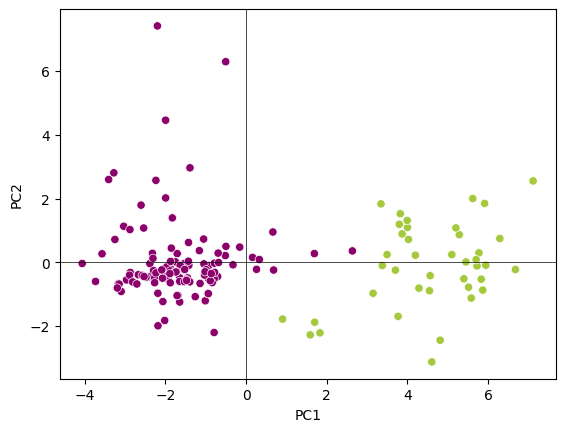

In [34]:
# Your code here...
# Add horizontal line and veritcal lines at 0,0
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
sns.scatterplot(data=pca_table, x="PC1", y="PC2", hue=pca_table.index, palette=ID_palette, legend=False)


## PCA and plotting of transposed data

In archaeological science it is common practice to transpose the dataset and perform PCA with elements set as the index. In other words, rather than have a row per sample and a column for each element, it is preferred to have a row per element and a column for each sample.

**Q11. Transpose the `cleaned_data` and store this converted dataset as `transposed_data`.**

In [35]:
# Your code here...
transposed_data = cleaned_data.T
pd.DataFrame(transposed_data)

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
Sodium,1.207680,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.416357,8.992053e-01,0.394176,0.760429,0.401282,0.646868,0.412169,0.457126,1.870472e-01,0.344319
Oxygen,0.000002,7.140000e-08,-0.000001,3.850000e-07,-0.000001,4.630000e-09,5.280000e-08,-0.000002,0.000002,-0.000003,...,0.000002,-4.410000e-07,-0.000002,-0.000002,-0.000002,0.000004,0.000001,-0.000002,-7.930000e-07,0.000001
Magnesium,0.094387,7.727857e-02,0.166517,1.119063e-01,0.107345,1.188157e-01,7.143916e-02,0.215417,0.373711,0.040159,...,1.578301,1.806853e+00,1.375346,1.439972,1.282003,1.269459,1.220084,1.420268,1.468536e+00,1.378667
Potassium,0.000000,1.126841e-01,0.261423,1.641086e-01,0.443995,4.347886e-01,3.418606e-01,0.318849,0.212581,0.510632,...,0.996450,9.951345e-01,1.048792,1.200704,1.120224,1.079125,1.300566,1.014952,1.105002e+00,1.015223
Calcium,3.134449,1.701345e+00,2.038331,1.555043e+00,2.773370,3.875111e+00,4.396350e+00,5.331294,6.600972,3.579475,...,5.808713,5.764633e+00,6.007130,6.601357,6.349509,6.168302,7.146763,5.905779,6.304850e+00,5.979480
Titanium,0.176351,1.502957e-01,0.124420,1.753693e-01,0.160835,1.880141e-01,1.205093e-01,0.120079,0.101754,0.249242,...,0.351982,3.477941e-01,0.354643,0.383601,0.343037,0.334103,0.324500,0.352876,3.622658e-01,0.331514
Iron,74.210419,7.890204e+01,76.549931,7.746410e+01,75.382715,7.448281e+01,7.369067e+01,70.587479,65.099005,75.850214,...,57.770241,5.701719e+01,57.830588,54.225836,55.858666,56.357368,55.489698,58.530244,5.625079e+01,58.315781
Aluminium,1.834800,1.338994e+00,1.498002,1.222445e+00,2.178886,2.382049e+00,1.545310e+00,1.551726,1.360731,2.547156,...,6.998362,7.055915e+00,7.323665,7.550712,7.459859,7.437651,6.886329,6.900180,7.409233e+00,7.091113
Silicon,17.519305,1.751620e+01,19.034282,1.902273e+01,18.627453,1.823490e+01,1.953540e+01,21.603247,25.432338,16.924384,...,22.926380,2.300691e+01,22.452575,24.183337,23.838067,23.371106,23.638425,22.251620,2.336935e+01,22.409454
Lead,0.018057,1.034880e-02,0.022423,5.016497e-02,0.021293,1.389716e-02,1.655756e-02,0.011859,0.026730,0.019440,...,0.018245,9.878308e-03,0.000000,0.004051,0.008742,0.009186,0.005883,0.001331,6.347730e-03,0.007521


**Q12. Based on the code you wrote earlier, create a function called `PCA_transformed_table` that:**


* Takes a dataset as an argument
* Scales the dataset
* Instantiates a PCA model
* Fits and transforms the scaled dataset
* Converts the fitted and transformed dataset to a `pd.DataFrame` using the index of the supplied dataset as the index
* Renames the columns from 0, 1, 2... to PC1, PC2, PC3...
* Returns this processed DataFrame.

Call the `PCA_transformed_table` function supplying `transposed_data` as an argument and storing the returned `pd.DataFrame` as `t_pca_table`.

In [36]:
# Your code here...
def PCA_transformed_table(data):
    df = data.copy()

    # Scale the data
    scaled_data = preprocessing.scale(df)

    pca = PCA()
    pca.fit(scaled_data)

    pca_data = pca.transform(scaled_data)
    pca_data = pd.DataFrame(pca_data).set_index(df.index)

    names = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6",
         "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",
         "PC13", "PC14", "PC15", "PC16", "PC17", "PC18",
         "PC19", "PC20", "PC21", "PC22", "PC23"]

    pca_data.columns = names

    return pca_data



t_pca_table = PCA_transformed_table(transposed_data)
t_pca_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Sodium,-3.798708,-0.310886,-0.064019,-0.050880,-0.023722,-0.061485,0.195475,0.019851,0.015634,-0.004397,...,5.304275e-05,-1.112488e-05,-3.950020e-05,2.447327e-06,-9.101357e-06,9.172478e-06,1.926272e-06,-4.368814e-08,2.461272e-08,7.347803e-16
Oxygen,-4.158375,-0.478518,-0.183171,0.018589,-0.018754,-0.010990,-0.011912,-0.007785,-0.003835,-0.005785,...,-5.193060e-04,-4.818685e-04,-1.809464e-04,-1.041277e-03,-8.789948e-04,-5.766062e-04,1.170535e-04,9.391937e-04,4.039449e-04,9.182266e-16
Magnesium,-2.934965,-0.091243,0.180767,-0.000148,0.201685,0.310606,0.031531,-0.041903,0.001734,0.001783,...,-7.208254e-06,-2.686650e-05,2.411201e-05,1.965109e-05,-7.052926e-06,9.956998e-07,2.925403e-08,2.994070e-07,3.693371e-08,6.895750e-16
Potassium,-3.230258,-0.067637,0.029967,-0.012213,-0.062530,-0.018324,-0.034944,-0.030157,0.076437,0.027633,...,8.916457e-05,4.377806e-06,-4.058095e-05,1.614449e-05,-2.285735e-05,1.740587e-05,1.504724e-06,1.787931e-06,-1.099703e-07,4.151249e-16
Calcium,1.728540,1.415378,1.433612,0.733164,-0.036532,-0.024586,0.002162,0.000970,-0.004194,-0.002342,...,1.163280e-05,-3.386696e-06,-1.390902e-05,-1.592871e-05,-5.564086e-07,-5.230060e-07,1.156476e-06,5.529467e-07,7.963244e-09,-1.568875e-16
Titanium,-3.844446,-0.377511,-0.135716,-0.004517,-0.017388,-0.006631,-0.008159,0.001239,-0.001016,-0.011683,...,-4.316390e-05,1.187073e-04,6.540475e-06,4.472428e-06,-2.551857e-05,-3.583064e-05,1.847866e-06,-6.931255e-06,-4.803492e-07,8.620095e-16
Iron,52.569658,-2.735674,0.046555,-0.021082,-0.002126,-0.000283,-0.000243,0.000490,0.000274,0.000063,...,5.682767e-07,-6.485395e-07,2.296811e-07,7.306554e-08,-5.162212e-07,-8.089101e-08,1.518190e-07,7.834825e-09,4.241597e-09,-7.039524e-15
Aluminium,1.484457,1.878841,1.215450,-0.681734,-0.160797,0.032406,-0.005598,-0.014461,-0.011479,-0.003397,...,-1.061127e-05,1.694667e-06,5.032390e-07,-3.880254e-06,9.259250e-06,-2.298074e-06,-5.047387e-07,-1.202288e-06,3.181088e-08,1.442206e-16
Silicon,17.546231,6.278389,-0.880225,0.056708,0.020322,-0.004570,0.001098,-0.000642,-0.000591,-0.000275,...,3.114354e-06,1.748565e-06,-1.474602e-06,-2.890659e-06,-1.231052e-06,-9.689334e-08,-2.237246e-07,1.783734e-07,6.447145e-09,-4.199354e-15
Lead,-4.151069,-0.479510,-0.183994,0.020787,-0.018780,-0.012021,-0.012144,-0.009215,-0.004746,-0.005409,...,-7.868473e-04,1.108672e-03,-3.514818e-03,4.210595e-03,-6.185396e-04,-5.115595e-05,-2.006157e-04,-3.271460e-05,1.117225e-06,6.602694e-16


**Q13. Use `seaborn` to plot the first _two_ principal components in a scatterplot.**


* Plot both PCA directions.
    - As before, this means a horizontal line passing through `0, 0`, and a vertical line passing through `0, 0`.
* Annotate each point by index (the element name). You may find [this link](https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/) useful.

<Axes: xlabel='PC1', ylabel='PC2'>

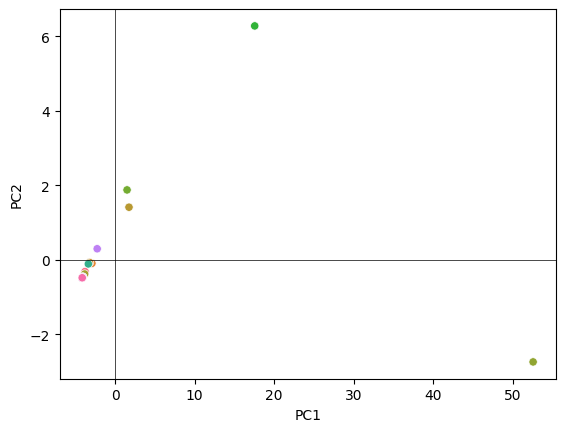

In [37]:
plt.axvline(0, color='black', lw=0.5)
plt.axhline(0, color='black', lw=0.5)
sns.scatterplot(data = t_pca_table, x="PC1", y="PC2", hue=t_pca_table.index,legend=False)

Which two elements stand out?

**Q14. Assign the names of the elements corresponding to the maximum values of PC1 and PC2 to a variable called `max_values`.**

This should be a `tuple` of the form `(<PC1 max value element>, <PC2 max value element>)`.

In [38]:
# Your code here...
# t_pca_table["PC2"].sort_values(ascending=False)
max_values = ("Iron", "Silicon")
